文档说明：

1. 目的统计 flomo 笔记的标签数量

TODO

1.绘制健身日志日历热力图

2. 目前对于多个标签的统计效果不佳，会将多个标签统计为新的标签
可视化效果处理也不佳



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"F:\Downloads\flomo_2021-12-27.csv")
print("数据清理前.后三行数据\n",df.tail(3))

#进行简单的数据清理：只包含照片的 memo Name 没有内容会影响之后分析
df.dropna(axis=0,how="any",inplace=True) #对数据进行清理，只要包含 Nan 就将整行删除
print("数据清理后,后三行数据\n")
df.tail(1)

数据清理前.后三行数据
      Name Tags Created At Link
2562  NaN  NaN        NaN  NaN
2563  NaN  NaN        NaN  NaN
2564  NaN  NaN        NaN  NaN
数据清理后,后三行数据



,Name,Tags,Created At,Link
2561,每个人都应该使用下 CiteSpace，它不仅是知识图谱工具，也是知识生成可视化过程。先是一...,信息分析,"November 27, 2020",https://flomoapp.com/mine/?memo_id=MTA2NDA3


In [7]:
#筛选出健身日志标签，并对相应的运动类型赋值
PhyAct = df[df["Tags"] == "健身日志/小王"]
i = 0
for indexs in PhyAct.index:
    #print(indexs)
    try:
        if "力量训练" in PhyAct.at[indexs,"Name"]:
            i = i+1
            PhyAct.at[indexs,"运动类型"] = "力量训练" #为力量训练赋值为 10 
            PhyAct.at[indexs,"运动指数"] = 45
        elif "乒乓球" in PhyAct.at[indexs,"Name"]:
            PhyAct.at[indexs,"运动类型"] = "有氧训练" #为力量训练赋值为 10 
            PhyAct.at[indexs,"运动指数"] = 31
        elif "羽毛球" in PhyAct.at[indexs,"Name"]:
            PhyAct.at[indexs,"运动类型"] = "有氧训练" #为力量训练赋值为 10 
            PhyAct.at[indexs,"运动指数"] = 33
        elif "篮球" in PhyAct.at[indexs,"Name"]:
            PhyAct.at[indexs,"运动类型"] = "有氧训练" #为力量训练赋值为 10 
            PhyAct.at[indexs,"运动指数"] = 35     
        else:
            PhyAct.at[indexs,"运动类型"] = "有氧训练" #为力量训练赋值为 10 
            PhyAct.at[indexs,"运动指数"] = 5   
    except:
        print(indexs,"存在问题")
        print(PhyAct.at[indexs,"Link"])

In [3]:
#将英文时间格式转换为纯数字形式
timedatas = [] #储存时间列表
import time
import datetime
cre_time = df["Created At"]
for time in cre_time:
    #print(time)
    try:
        time_format = datetime.datetime.strptime(time,"%B %d, %Y")
    except:
        print(time)
    timedata = datetime.datetime.strftime(time_format,"%Y-%m-%d")
    timedatas.append([timedata])
timedatas
timedata_df = pd.DataFrame(timedatas)
#ref：[python英文日期转数字年月日格式_划船的使者的博客-CSDN博客_python 英文日期](https://blog.csdn.net/weixin_42185136/article/details/94718201)


In [6]:
# 绘制健身日历图
import datetime
import random

from pyecharts import options as opts
from pyecharts.charts import Calendar

data = [
    [timedata_df.iat[indexs,0],PhyAct.at[indexs,"运动指数"]]
    for indexs in PhyAct.index
    ]
    
calendar=(
        Calendar()
        .add("", data, calendar_opts=opts.CalendarOpts(range_="2021"))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="2021年运动情况"),
            visualmap_opts=opts.VisualMapOpts(
                max_=0,
                min_=50,
                orient="horizontal",
                is_piecewise=True,
                pos_top="230px",
                pos_left="100px",
            ),
        )
        
    )

calendar.render_notebook()
#0-10 待分类运动项目
#11-20 柔韧+功能性项目
#21-30 力量耐力
#31-40 有氧训练
#41-50 最大力量


In [30]:
import datetime
import random

from pyecharts import options as opts
from pyecharts.charts import Calendar

begin = datetime.date(2017, 1, 1)
end = datetime.date(2017, 12, 31)
data = [
        [str(begin + datetime.timedelta(days=i)), random.randint(1000, 25000)]
        for i in range((end - begin).days + 1)
    ]

calendar=(
        Calendar()
        .add("", data, calendar_opts=opts.CalendarOpts(range_="2017"))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Calendar-2017年微信步数情况"),
            visualmap_opts=opts.VisualMapOpts(
                max_=20000,
                min_=500,
                orient="horizontal",
                is_piecewise=True,
                pos_top="230px",
                pos_left="100px",
            ),
        )
        
    )

calendar.render_notebook()

In [ ]:
tags_count = df["Tags"].value_counts() #统计不同标签出现的频数 
pd.set_option("display.max_rows",None) #保证能够显示所有标签的统计频数，不加这一句会只显示部分数据
print(tags_count) #显示 tag

In [3]:
print("一共拥有标签个数:",len(tags_count))

一共拥有标签个数: 285


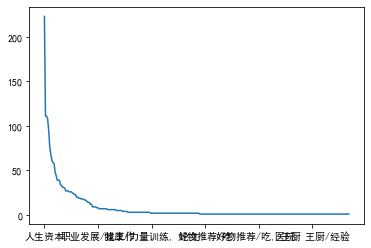

In [6]:
plt.rcParams["font.family"] = "SimHei" #显示中文
tags_count.plot() #绘制折线图

#发现自己的flomo 记录数量惊人的符合幂率分布
#20% 的标签内容占据了80% 的内容

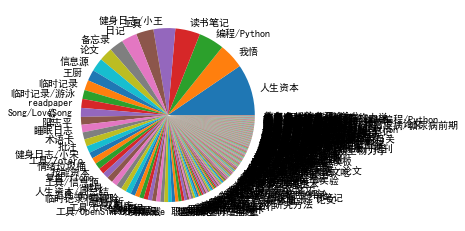

In [7]:
#绘制一个饼状图
tags_count.plot.pie();

In [31]:
data

[['2017-01-01', 12711],
 ['2017-01-02', 11035],
 ['2017-01-03', 22856],
 ['2017-01-04', 1001],
 ['2017-01-05', 22775],
 ['2017-01-06', 7118],
 ['2017-01-07', 2635],
 ['2017-01-08', 22741],
 ['2017-01-09', 14564],
 ['2017-01-10', 16236],
 ['2017-01-11', 21231],
 ['2017-01-12', 8826],
 ['2017-01-13', 3720],
 ['2017-01-14', 20391],
 ['2017-01-15', 22756],
 ['2017-01-16', 8216],
 ['2017-01-17', 7583],
 ['2017-01-18', 7846],
 ['2017-01-19', 13310],
 ['2017-01-20', 19982],
 ['2017-01-21', 6339],
 ['2017-01-22', 10816],
 ['2017-01-23', 12110],
 ['2017-01-24', 11738],
 ['2017-01-25', 23910],
 ['2017-01-26', 23535],
 ['2017-01-27', 20127],
 ['2017-01-28', 5055],
 ['2017-01-29', 15933],
 ['2017-01-30', 20218],
 ['2017-01-31', 19439],
 ['2017-02-01', 7206],
 ['2017-02-02', 7227],
 ['2017-02-03', 14774],
 ['2017-02-04', 12733],
 ['2017-02-05', 4100],
 ['2017-02-06', 13315],
 ['2017-02-07', 10913],
 ['2017-02-08', 15954],
 ['2017-02-09', 18332],
 ['2017-02-10', 16382],
 ['2017-02-11', 14854],
 ['20

In [32]:
import datetime
import random

from pyecharts import options as opts
from pyecharts.charts import Calendar

begin = datetime.date(2017, 1, 1)
end = datetime.date(2017, 12, 31)
data = [['2017-01-01', 12711],
 ['2017-01-02', 11035],
 ['2017-01-03', 22856],
 ['2017-01-04', 1001],
 ['2017-01-05', 22775],
 ['2017-01-06', 7118],
 ['2017-01-07', 2635],
 ['2017-01-08', 22741],
 ['2017-01-09', 14564],
 ['2017-01-10', 16236],
 ['2017-01-12', 8826],
 ['2017-01-13', 3720],
 ['2017-01-14', 20391],
 ['2017-01-15', 22756]]

calendar=(
        Calendar()
        .add("", data, calendar_opts=opts.CalendarOpts(range_="2017"))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Calendar-2017年微信步数情况"),
            visualmap_opts=opts.VisualMapOpts(
                max_=20000,
                min_=500,
                orient="horizontal",
                is_piecewise=True,
                pos_top="230px",
                pos_left="100px",
            ),
        )
        
    )

calendar.render_notebook()